In [62]:
import pandas as pd
import numpy as np
import folium
from sklearn.preprocessing import MinMaxScaler

# 1. Load CSV full_sensor_data to DataFrame

In [63]:
history = pd.read_csv("data/full_sensor_data.csv", parse_dates=True, index_col="UTC time")
history_scaled = pd.DataFrame(MinMaxScaler().fit_transform(history), columns=history.columns, index=history.index)
history_aggegated_1D = history_scaled.groupby(pd.Grouper(freq='1D')).mean()
history_aggegated_1D.columns = pd.MultiIndex.from_tuples([(c.split('_')[0], c.split('_')[1]) for c in history_aggegated_1D.columns])

C:\Users\haga\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\haga\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


# 2. Load CSV sensor_locations to DataFrame


In [64]:
sensor_locations = pd.read_csv('data/sensor_locations.csv', index_col="id")
center = (sensor_locations.mean()['latitude'], sensor_locations.mean()['longitude'])

krakow_map = folium.Map(location=center, zoom_start=13)

for index, sensor_location in sensor_locations.iterrows():
    location = [sensor_location['latitude'], sensor_location['longitude']]
    folium.Marker(location, popup = f'id: {index}\n latitude: {sensor_location["latitude"]}\n longitude: {sensor_location["longitude"]}').add_to(krakow_map)
    
krakow_map

In [83]:
def show_sensor_by_id(sensor_id: str):
    krakow_map = folium.Map(location=center, zoom_start=12)
    location = sensor_locations.loc[sensor_id]["latitude"], sensor_locations.loc[sensor_id]["longitude"]
    folium.Marker(location, popup = f'id: {sensor_id}\n latitude: {location[0]}\n longitude: {location[1]}').add_to(krakow_map)
    return krakow_map

show_sensor_by_id(227)

## Very similar locations for these pairs of sensors:

* **3 & 140**

In [66]:
sensor_locations[sensor_locations.index.isin([3,140])]

,latitude,longitude
id,,
3,50.057748,19.961375
140,50.057747,19.961374


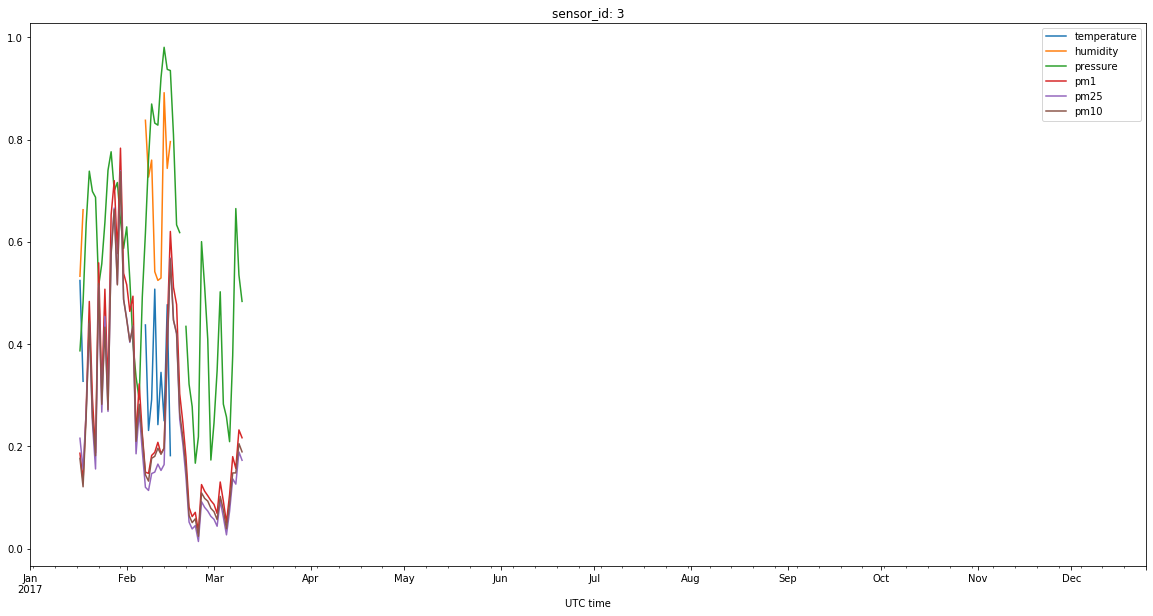

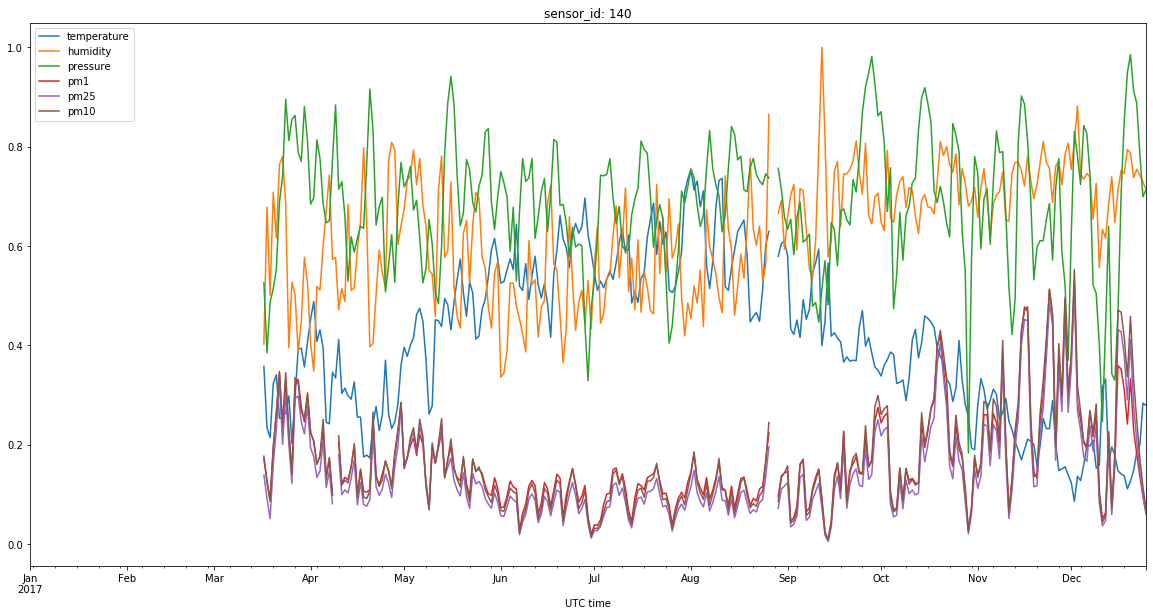

In [67]:
sensor_ids = ['3','140']
for sensor_id in sensor_ids:
    history_aggegated_1D[sensor_id].plot(figsize=(20, 10), title='sensor_id: ' + sensor_id)

* **227 & 857**

In [68]:
sensor_locations[sensor_locations.index.isin([227,857])]

,latitude,longitude
id,,
227,50.037680,19.990546
857,50.037663,19.990601


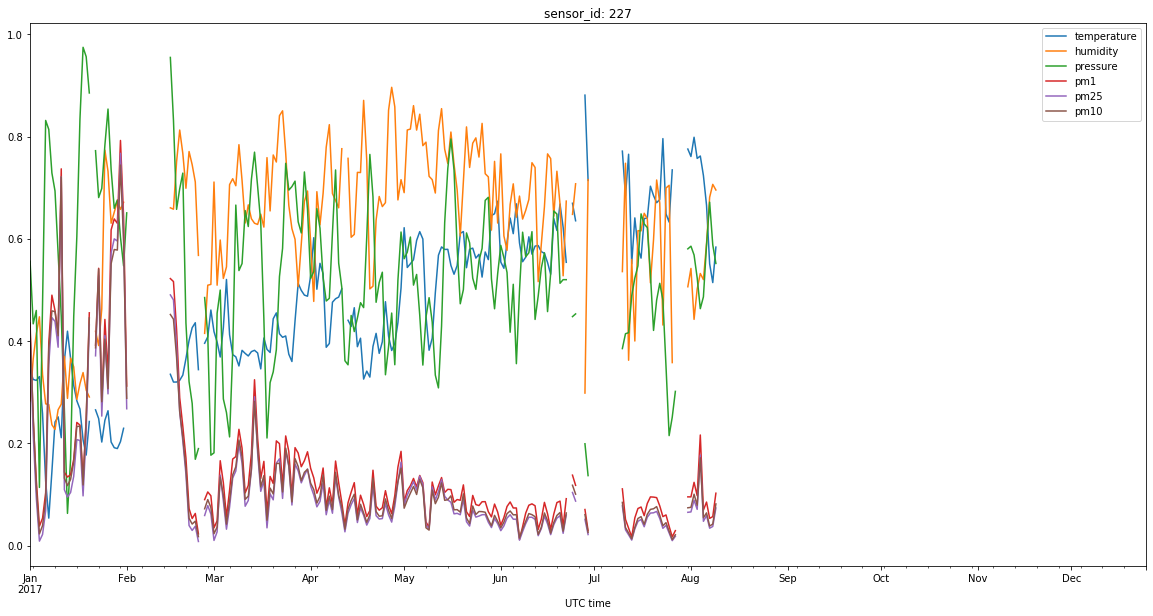

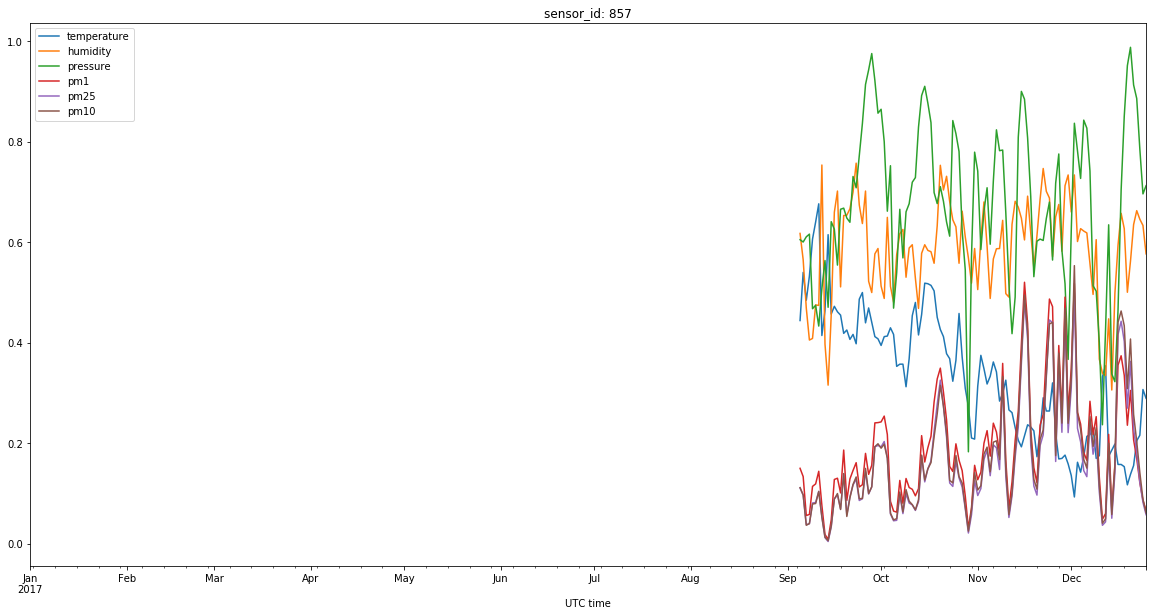

In [69]:
sensor_ids = ['227','857']
for sensor_id in sensor_ids:
    history_aggegated_1D[sensor_id].plot(figsize=(20, 10), title='sensor_id: ' + sensor_id)

* **178 & 713**

In [70]:
sensor_locations[sensor_locations.index.isin([178,713])]

,latitude,longitude
id,,
178,50.033195,19.900714
713,50.032902,19.900930


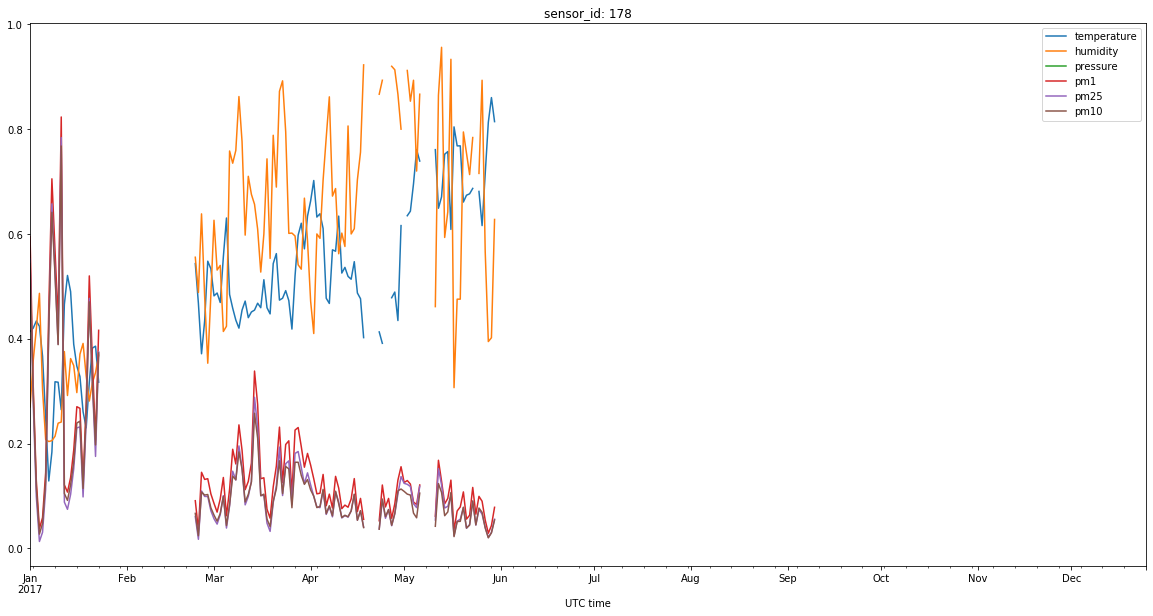

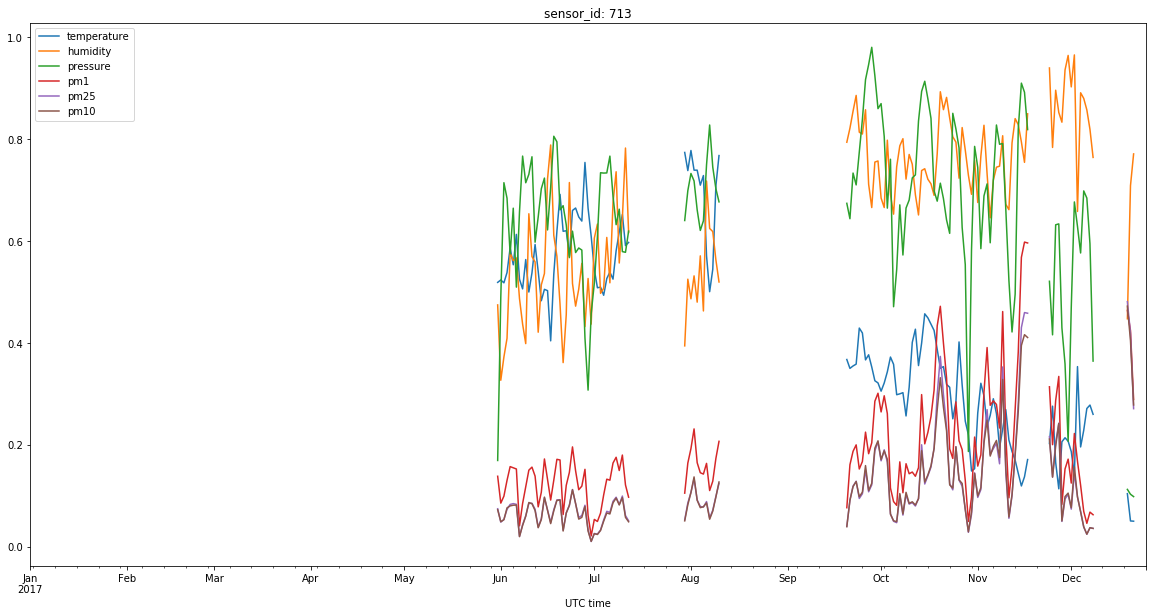

In [71]:
sensor_ids = ['178','713']
for sensor_id in sensor_ids:
    history_aggegated_1D[sensor_id].plot(figsize=(20, 10), title='sensor_id: ' + sensor_id)

* **142 & 855**


In [72]:
sensor_locations[sensor_locations.index.isin([142,895])]

,latitude,longitude
id,,
142,50.084816,19.878066
895,50.084966,19.877998


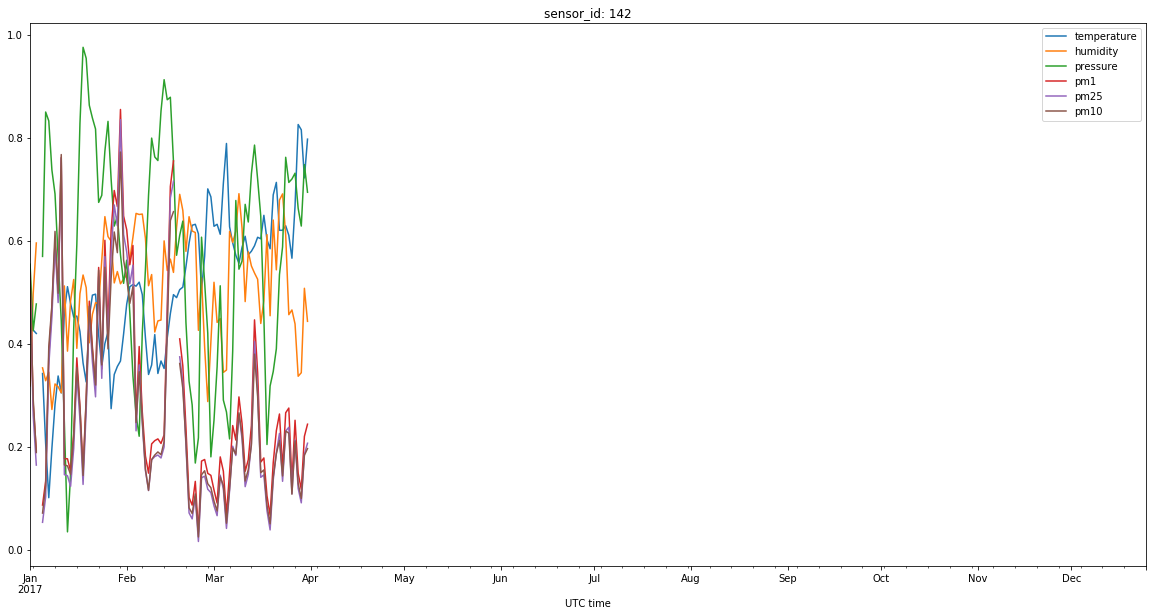

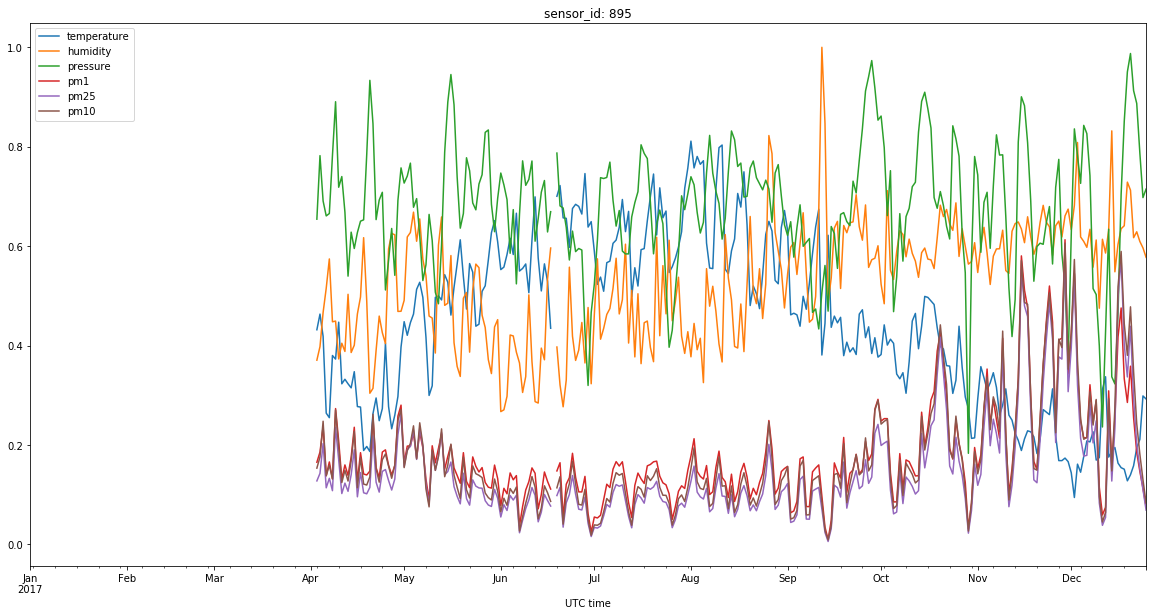

In [73]:
sensor_ids = ['142','895']
for sensor_id in sensor_ids:
    history_aggegated_1D[sensor_id].plot(figsize=(20, 10), title='sensor_id: ' + sensor_id)

* **187 & 808**


In [74]:
sensor_locations[sensor_locations.index.isin([187,808])]

,latitude,longitude
id,,
187,50.096969,19.914774
808,50.096970,19.914774


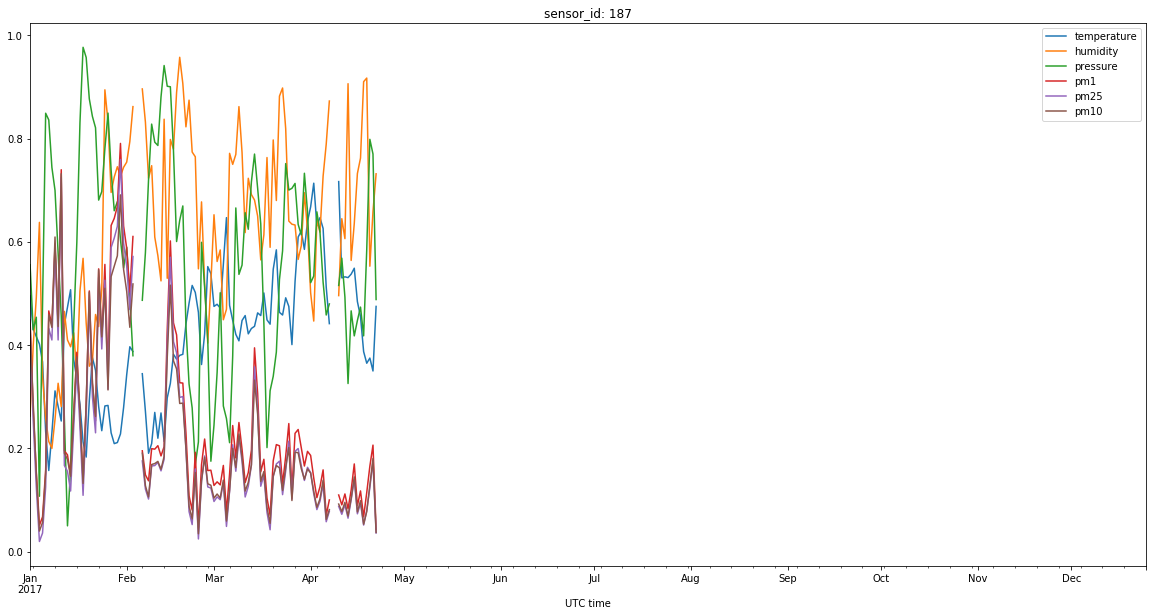

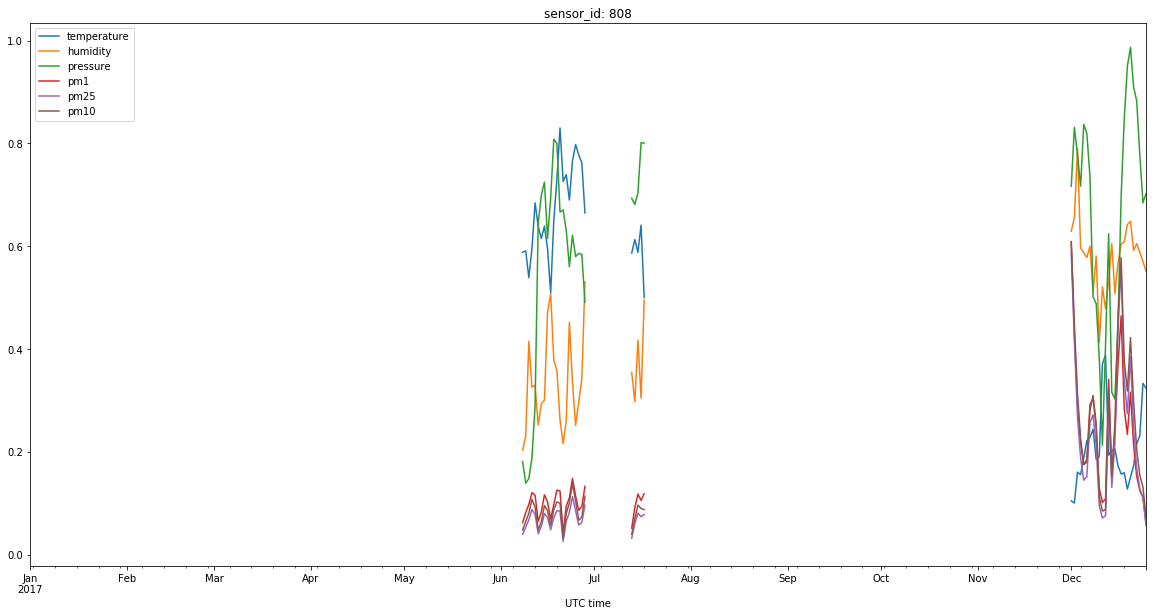

In [75]:
sensor_ids = ['187','808']
for sensor_id in sensor_ids:
    history_aggegated_1D[sensor_id].plot(figsize=(20, 10), title='sensor_id: ' + sensor_id)

* **211 & 622**

In [78]:
sensor_locations[sensor_locations.index.isin([211,622])]

,latitude,longitude
id,,
211,50.044424,19.952205
622,50.044418,19.952200


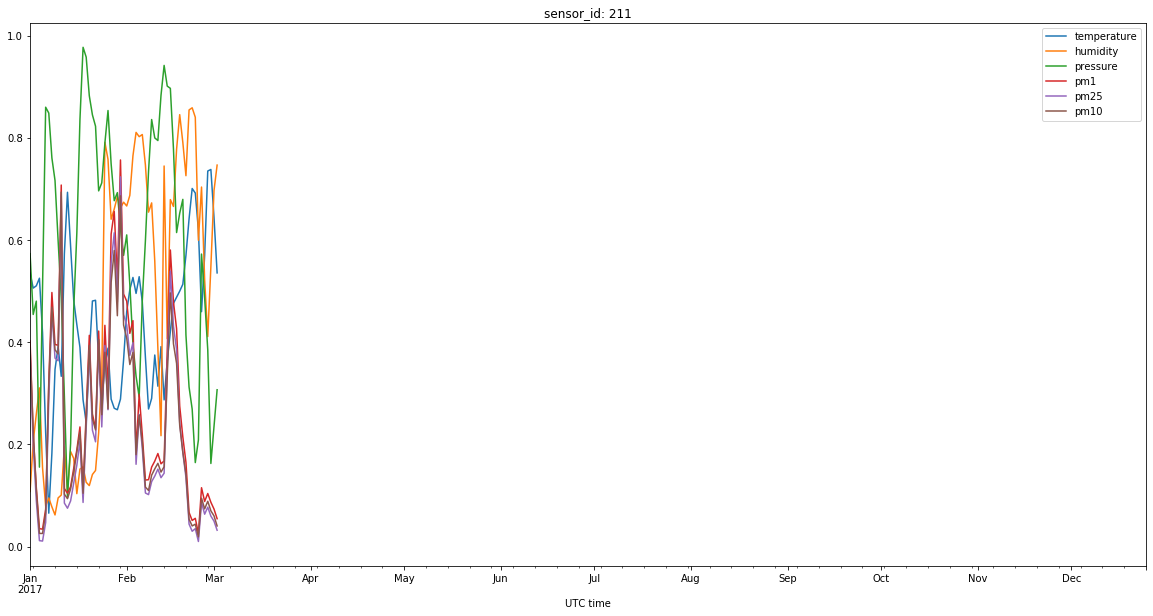

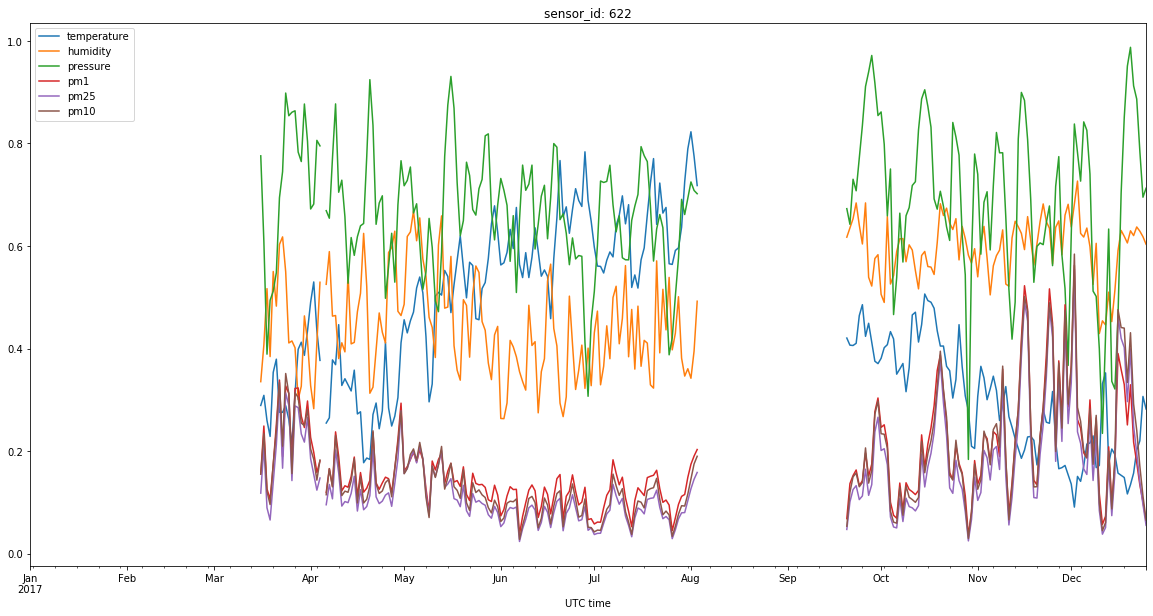

In [80]:
sensor_ids = ['211','622']
for sensor_id in sensor_ids:
    history_aggegated_1D[sensor_id].plot(figsize=(20, 10), title='sensor_id: ' + sensor_id)